In [65]:
exp1_results  = "../../outputs/exp1_full_results.csv"
exp_name = "exp1"

In [66]:
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os 

In [67]:
all_models_df = pd.read_csv(exp1_results)

In [68]:
all_models_df.head()

,MAE,RMSE,SMAPE,r2,MASE,Training Time,Training_time_log,Inference Time,Inference_time_log,Model memory (MB),Model,Window Size
0,3.927489,9.298923,21.414227,0.904535,1.014372,21.147614,3.097730,0.162672,0.150721,0.08429,Random Forest,12
1,3.933515,9.303145,21.396935,0.904448,1.015928,21.108307,3.095953,0.163902,0.151778,0.08429,Random Forest,12
2,3.960965,9.325393,21.457147,0.903991,1.023018,21.186098,3.099466,0.163614,0.151531,0.08429,Random Forest,12
3,3.916643,9.274102,21.270941,0.905044,1.011570,21.102024,3.095669,0.162608,0.150666,0.08429,Random Forest,12
4,3.917989,9.264176,21.349911,0.905247,1.011918,21.073231,3.094366,0.164201,0.152035,0.08429,Random Forest,12


In [69]:
len(all_models_df.Model.unique())

13

In [70]:
all_models_df

,MAE,RMSE,SMAPE,r2,MASE,Training Time,Training_time_log,Inference Time,Inference_time_log,Model memory (MB),Model,Window Size
0,3.927489,9.298923,21.414227,0.904535,1.014372,21.147614,3.097730,0.162672,0.150721,0.08429,Random Forest,12
1,3.933515,9.303145,21.396935,0.904448,1.015928,21.108307,3.095953,0.163902,0.151778,0.08429,Random Forest,12
2,3.960965,9.325393,21.457147,0.903991,1.023018,21.186098,3.099466,0.163614,0.151531,0.08429,Random Forest,12
3,3.916643,9.274102,21.270941,0.905044,1.011570,21.102024,3.095669,0.162608,0.150666,0.08429,Random Forest,12
4,3.917989,9.264176,21.349911,0.905247,1.011918,21.073231,3.094366,0.164201,0.152035,0.08429,Random Forest,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,8.870964,13.254601,36.105197,0.806418,2.288412,0.051674,0.050383,0.000867,0.000866,0.00428,Passive Aggressive (PA),32
1316,5.806187,11.402953,29.457564,0.856726,1.497802,0.030384,0.029931,0.000942,0.000942,0.00425,Passive Aggressive (PA),32
1317,5.694671,11.177489,30.548744,0.862336,1.469035,0.030669,0.030208,0.000818,0.000818,0.00425,Passive Aggressive (PA),32
1318,6.088813,11.271254,28.080272,0.860017,1.570710,0.036525,0.035874,0.000870,0.000870,0.00428,Passive Aggressive (PA),32


In [71]:
all_models_df.Model.unique()

array(['Random Forest', 'Ada Boost Regressor', 'Linear Regression (LR)',
       'Decision Tree Regressor', 'BI-LSTM', 'XGBoost Regressor',
       'Support Vector Regressor (SVR)', 'GRU', 'LSTM',
       'K-Neighbors Regressor', 'SGD Regressor',
       'Passive Aggressive (PA)', 'LSTM with Attention'], dtype=object)

In [72]:
if exp_name=="exp1":
    model_mapping = {
        'Support Vector Regressor (SVR)': 'SVR',
        'Random Forest': 'Random Forest',
        'K-Neighbors Regressor': 'KNN',
        'LSTM': 'LSTM',
        'GRU': 'GRU',
        'Ada Boost Regressor': 'Ada-Boost',
        'SGD Regressor': 'SGD',
        'BI-LSTM': 'BI-LSTM',
        'XGBoost Regressor': 'XGBoost',
        'LSTM with Attention': 'LSTM + Attention',
        'Passive Aggressive (PA)': 'PA',
        'Linear Regression (LR)': 'LR',
        'Decision Tree Regressor': 'Decision Tree'
    }
else:
    model_mapping = {
            'Adaptive Random Forest (ARF)':'ARF',
            'SGD Regressor':'SRP',
            'Hoeffding Tree Regressor':'HTR',
            'Hoeffding Adaptive Tree Regressor':'HATR', 
            'Passive Aggressive (PA)':'PA'
        }
# Update the Model column
all_models_df['Model'] = all_models_df['Model'].replace(model_mapping)
all_models_df

,MAE,RMSE,SMAPE,r2,MASE,Training Time,Training_time_log,Inference Time,Inference_time_log,Model memory (MB),Model,Window Size
0,3.927489,9.298923,21.414227,0.904535,1.014372,21.147614,3.097730,0.162672,0.150721,0.08429,Random Forest,12
1,3.933515,9.303145,21.396935,0.904448,1.015928,21.108307,3.095953,0.163902,0.151778,0.08429,Random Forest,12
2,3.960965,9.325393,21.457147,0.903991,1.023018,21.186098,3.099466,0.163614,0.151531,0.08429,Random Forest,12
3,3.916643,9.274102,21.270941,0.905044,1.011570,21.102024,3.095669,0.162608,0.150666,0.08429,Random Forest,12
4,3.917989,9.264176,21.349911,0.905247,1.011918,21.073231,3.094366,0.164201,0.152035,0.08429,Random Forest,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,8.870964,13.254601,36.105197,0.806418,2.288412,0.051674,0.050383,0.000867,0.000866,0.00428,PA,32
1316,5.806187,11.402953,29.457564,0.856726,1.497802,0.030384,0.029931,0.000942,0.000942,0.00425,PA,32
1317,5.694671,11.177489,30.548744,0.862336,1.469035,0.030669,0.030208,0.000818,0.000818,0.00425,PA,32
1318,6.088813,11.271254,28.080272,0.860017,1.570710,0.036525,0.035874,0.000870,0.000870,0.00428,PA,32


# Boxplot fetched by means

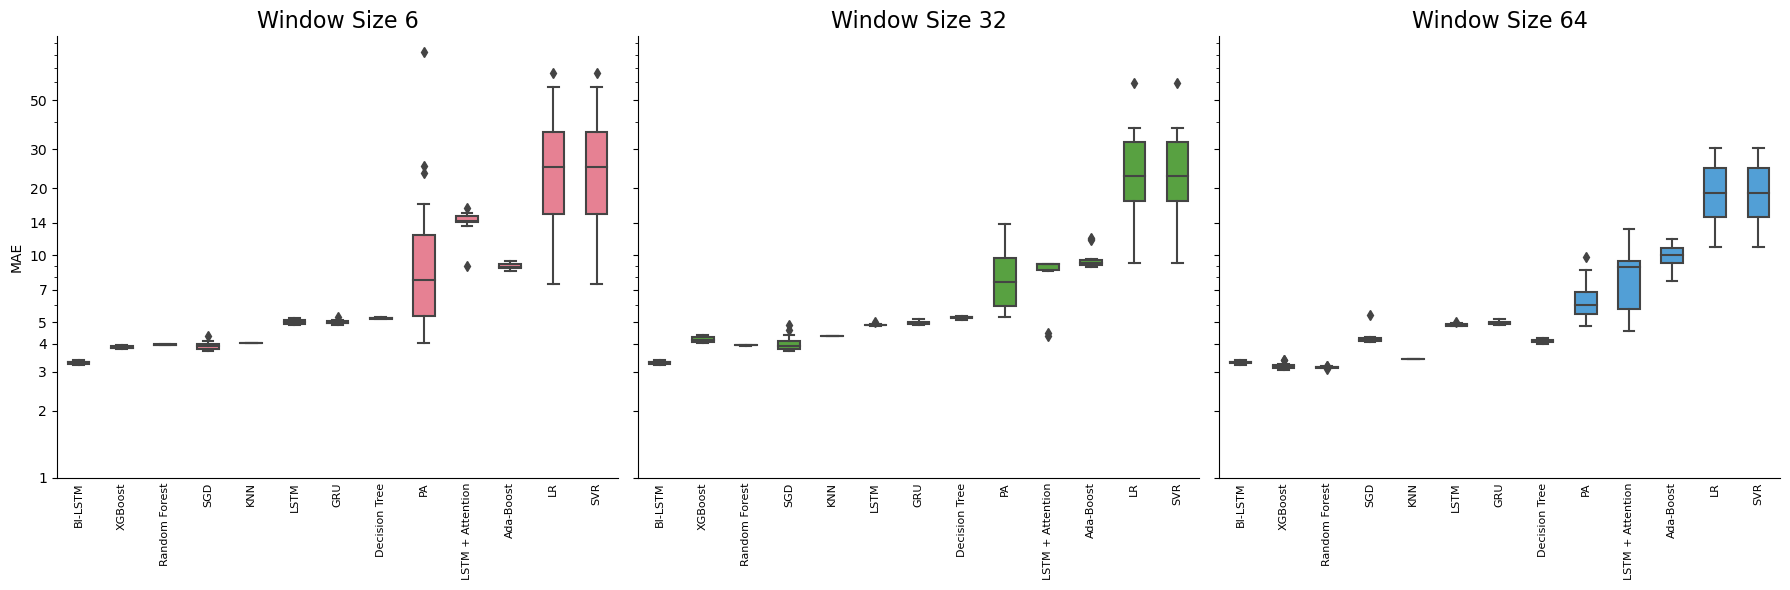

In [73]:
def order_by_median(df,reverse = False):
    grouped_df = df.groupby('Model')
    algo_medians = {}
    for cur_group in grouped_df.groups.keys():
        df_cur_grp = grouped_df.get_group(cur_group)
        algo_medians[cur_group] = df_cur_grp['MAE'].median()
    sorted_algo_medians = dict(sorted(algo_medians.items(), key=lambda kv: kv[1], reverse=reverse))
    return list(sorted_algo_medians.keys())

def draw_save_boxplot(df, hue_order_learner, save_filename, prequential=False):
    # Define a custom color palette with enough colors for each boxplot
    custom_palette = sns.color_palette("husl", n_colors=len(hue_order_learner))

    # Create a FacetGrid with 3 columns and adjust spacing
    g = sns.FacetGrid(df, col='Window Size', col_wrap=3, height=6, aspect=1, 
                      margin_titles=True, sharex=False)

    # Map boxplot to the FacetGrid with custom colors
    ordered_algo_list = order_by_median(df, reverse=False)
    g.map_dataframe(sns.boxplot, x='Model', y=metric_type, hue='Window Size', 
                    data=df, order=ordered_algo_list, dodge=False, width=0.5, 
                    hue_order=hue_order_learner, palette=custom_palette)
    
    # Rotate x-axis labels
    g.set_xticklabels(rotation=90)

    # Customize titles and formatting
    
    g.set_titles(col_template="Window Size {col_name}", fontsize=100)  
    g.set(yscale='log')  # Set y-axis scale to logarithmic

    # Adjust y-axis ticks and labels
    if exp_name=="exp1":
        y_ticks = [1, 2, 3, 4, 5, 7, 10, 14,  20, 30, 50]
    else:
        y_ticks = [1, 2, 3, 4, 5, 7, 10]
    g.set(yticks=y_ticks)
    g.set_yticklabels(y_ticks, fontsize=10)

    g.set_ylabels(metric_type, fontsize=10)
    g.set_xlabels('')

    # Annotate x-axis with algorithm names
    for ax in g.axes.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8, ha='center')
        ax.tick_params(axis='x', which='both', length=0)
        for tick in ax.get_xticklabels():
            algorithm_name = tick.get_text()
            ax.annotate(algorithm_name, xy=(tick.get_position()[0], 0), xytext=(0, -20),
                        textcoords='offset points', ha='center', va='top', rotation=90, fontsize=10)
        # Explicitly set the font size of the titles
    for ax in g.axes.flat:
        title = ax.get_title()
        ax.set_title(title, fontsize=16)  # Set title font size to 24

    # Save the plot
    plt.tight_layout()
    plt.savefig(f'./images/box_plot_{save_filename}.pdf', dpi=300)
    plt.show()


metric_type = 'MAE'

filter_values = [6, 32, 64]

filtered_df = all_models_df[all_models_df['Window Size'].isin(filter_values)]

hue_order_learner = sorted(filtered_df['Window Size'].unique())


os.makedirs("./images", exist_ok=True)

draw_save_boxplot(filtered_df, hue_order_learner, exp_name)